In [1]:
from citipy import citipy
import csv
import kdtree
import os
import random
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import openweathermapy as ow

#test that citpy library is working
city = citipy.nearest_city(22.99, 120.21)
city

print(city.city_name)     # Tainan, my home town

print(city.country_code)   # And the country is surely Taiwan

tainan
tw


In [2]:
#use numpy random unifrom function to get evently spaced latitudes and longitudes (-90 to 90, -180 to 180)
#populate one list for lat, one for long
lat_list = np.random.uniform(-90, 90, 550)
lon_list = np.random.uniform(-180, 180, 550)

#print(lat_list)
#print(lon_list)


In [3]:
#use citipy to generate cities and country code for those lists
city_list = []
country_list = []

for (lat, lon) in zip(lat_list, lon_list):
    
    city = citipy.nearest_city(lat, lon)
  
    city_list.append(city.city_name)
    country_list.append(city.country_code)
    
#print(city_list)
#print(country_list)

In [4]:
#turn that into a dataframe
cities_df = pd.DataFrame(np.column_stack([lat_list, lon_list, city_list, country_list]), 
                               columns=['Input Latitude', 'Input Longitude', 'City', 'Country Code'])
cities_df.head()

,Input Latitude,Input Longitude,City,Country Code
0,40.19816761212215,80.62127019345218,aksu,cn
1,82.7617171808077,67.67656031389171,amderma,ru
2,24.385027496903774,65.8441042214397,karachi,pk
3,-62.83620024644605,-94.66579007448047,punta arenas,cl
4,82.60974539014194,90.69761643141709,talnakh,ru


In [5]:
#take the inputs out of df so we have a clean df to send to csv
reduced_cities_df = cities_df[['City', 'Country Code']]
print(reduced_cities_df)

                       City Country Code
0                      aksu           cn
1                   amderma           ru
2                   karachi           pk
3              punta arenas           cl
4                   talnakh           ru
5                    malwan           in
6               new norfolk           au
7                   mataura           pf
8                 ilulissat           gl
9                  klaksvik           fo
10                   playas           ec
11                  rikitea           pf
12                 prenzlau           de
13              new norfolk           au
14                   dikson           ru
15              nizhneyansk           ru
16                    bluff           nz
17                   halalo           wf
18               bredasdorp           za
19                taolanaro           mg
20                     esna           eg
21                  ushuaia           ar
22                    kapaa           us
23              

In [6]:
#turn it into a csv inorder to hit the openweather api, loop through 
reduced_cities_df.to_csv("Output/cities.csv", encoding="utf-8", index=False, header=False)

In [7]:
# Create a settings object with your API key and preferred units
#api_key = "85e7df885565606034ad67f99611b82f"

#settings = {"units": "imperial", "appid": api_key}

#cities = []
#real_lat = []
#real_lon = []
#temp = []
#hum = []
#cloud = []
#wind = []

In [8]:
# Get data for each city in cities.csv
#with open("output/cities.csv") as cityfile:
    #cityData = csv.reader(cityfile)
    #for city in cityData:
        #cities.append(city[0])

#print(cities)    
    
#for city in cities:
    #weather_data = ow.get_current(city, **settings)
    #real_lat.append(weather_data["coord"]["lat"])
    #real_lon.append(weather_data["coord"]["lon"])
    #temp.append(weather_data["main"]["temp"])
    #hum.append(weather_data["main"]["humidity"])
    #cloud.append(weather_data["clouds"]["all"])
    #wind.append(weather_data["wind"]["speed"])

#print(real_lat)
#print(real_lon)
#print(temp)
#print(hum)
#print(cloud)
#print(wind)



In [9]:
#api.openweathermap.org/data/2.5/weather?q={city name},{country code}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "85e7df885565606034ad67f99611b82f"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [10]:
# Pretty print the json for a test country to see the response data
#response = requests.get(query_url + "saint george" + "," + "bm")
#print(json.dumps(response, indent=4, sort_keys=True))

In [11]:
# set up lists to hold reponse info
real_lat = []
real_lon = []
temp = []
hum = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
# Sometimes getting an error for the coord of a city, so incorporate a try-except to skip any that 
#are missing a data point.


for (city, country) in zip(city_list, country_list):
    try:
        city_data = requests.get(query_url + city).json()
        real_lat.append(city_data["coord"]["lat"])
        real_lon.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp"])
        hum.append(city_data["main"]["humidity"])
        cloud.append(city_data["clouds"]["all"])
        wind.append(city_data["wind"]["speed"])
    except (KeyError, ValueError):
        real_lat.append(None)
        real_lon.append(None)
        temp.append(None)
        hum.append(None)
        cloud.append(None)
        wind.append(None)
    
#print(f"The latitude information received is: {real_lat}")
#print(f"The longitude information received is: {real_lon}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloudiness information received is: {cloud}")
#print(f"The wind speed information received is: {wind}")




In [12]:
weather_dict = {
    "city": city_list,
    "country code": country_list,
    "lat": real_lat,
    "lon": real_lon,
    "temp": temp,
    "humidity": hum,
    "cloudiness": cloud,
    "wind speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(15)

,city,cloudiness,country code,humidity,lat,lon,temp,wind speed
0,aksu,75.0,cn,87.0,52.04,76.93,32.00,13.42
1,amderma,NaN,ru,NaN,NaN,NaN,NaN,NaN
2,karachi,0.0,pk,69.0,24.87,67.03,80.60,11.41
3,punta arenas,0.0,cl,86.0,-53.16,-70.91,39.20,14.67
4,talnakh,12.0,ru,91.0,69.49,88.39,-7.46,4.16
5,malwan,NaN,in,NaN,NaN,NaN,NaN,NaN
6,new norfolk,20.0,au,40.0,-42.78,147.06,71.60,17.22
7,mataura,92.0,pf,73.0,-46.19,168.86,59.15,27.98
8,ilulissat,20.0,gl,78.0,69.22,-51.10,10.40,5.82
9,klaksvik,48.0,fo,86.0,62.23,-6.59,26.60,14.99


In [13]:
#drop NaNs
weather_data.dropna()

,city,cloudiness,country code,humidity,lat,lon,temp,wind speed
0,aksu,75.0,cn,87.0,52.04,76.93,32.00,13.42
2,karachi,0.0,pk,69.0,24.87,67.03,80.60,11.41
3,punta arenas,0.0,cl,86.0,-53.16,-70.91,39.20,14.67
4,talnakh,12.0,ru,91.0,69.49,88.39,-7.46,4.16
6,new norfolk,20.0,au,40.0,-42.78,147.06,71.60,17.22
7,mataura,92.0,pf,73.0,-46.19,168.86,59.15,27.98
8,ilulissat,20.0,gl,78.0,69.22,-51.10,10.40,5.82
9,klaksvik,48.0,fo,86.0,62.23,-6.59,26.60,14.99
10,playas,76.0,ec,95.0,-2.64,-80.39,73.82,4.38
11,rikitea,20.0,pf,100.0,-23.12,-134.97,79.04,4.94


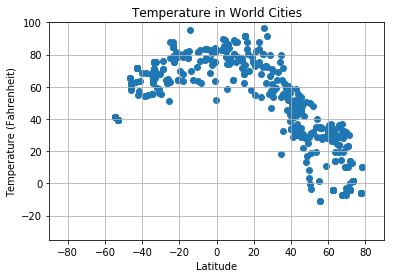

In [14]:
# Build a scatter plot for temp, hum, cloud, wind vs lat
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-35, 100)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

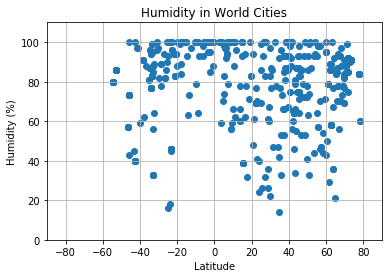

In [15]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(0, 110)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

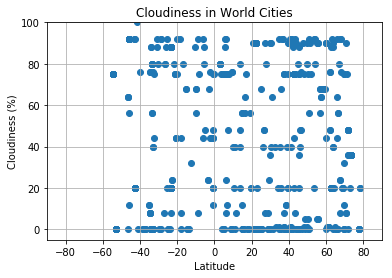

In [16]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-5, 100)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

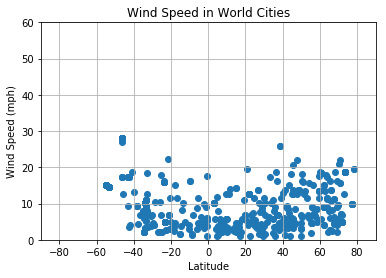

In [17]:
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(0, 60)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [18]:
#Soo... the script above runs fine... sometimes. Sometimes, I get a "coord" error in the for loop when I ping 
#the Openweather API, almost as though sometimes the API doesn't recognize some of the cities generated. I tried to 
#write a try/except for this so that it places Nan in the list if the API doesn't find a coordinate for a city, but
#that didn't seem to work for me. I've saved the code here to show that it can and does run... it just doesn't always
#run like this. I'd love to go over how to best debug this.

#Monday after class fix! :)

In [19]:
#Observable trends:
#1. The closer the latitude to zero, the higher the temp. (Duh.)
#2. Hmmm... wind speed seems fairly concentrated between 0 and 20 mph, no matter the latitude.
#3. Cloudiness is all over the map...
#4. And humidity seems very high overall, no matter latitude between